In [3]:
#Making necessary imports
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'

In [43]:
#Storing demography information in a dataframe
df_demography = pd.read_excel(r'Demography_USA.xlsx', sheet_name=None)
#print(df_demography['Races])

In [4]:
#Storing pharmacy information in a dataframe
df_pharmacy = pd.read_excel(r'Pharmacy-County.xlsx', sheet_name=None)
#print(df_pharmacy['Arkansas'])

In [5]:
#Listing all the states for which we have county information

states_with_county_info = ['Alaska', 'Arkansas', 'California', 'Hawaii', 'Idaho', 'Maine', 'Missouri', 'Montana',
 'Nebraska', 'North Carolina', 'Oregon', 'Rhode island', 'Texas', 'Other State'] 

other_states = ['Arizona', 'Georgia', 'Iowa', 'Illinois', 
 'Indianapolis', 'Kentucky', 'Louisiana', 'Maine', 'Minnesota', 'Mississipi', 'New York', 'Ohio', 
 'Pennsylvania', 'South Carolina', 'Virginia', 'Washington']

In [6]:
# Creating a dataframe to store only rows with county information
df_states_county = pd.DataFrame()

In [ ]:
for state in states_with_county_info:
    if state == 'Other State':
        df_temp_other_state = df_pharmacy[state]
        #print(df_pharmacy[state])
        for ix in df_temp_other_state.index:
            state_name = df_temp_other_state.loc[ix]['State']
            #print(state_name)
            if state_name in other_states:
                #print(df_temp_other_state.loc[ix])
                df_states_county = df_states_county.append(df_temp_other_state.loc[ix])
    
    else:
        df_temp_state = df_pharmacy[state]
        df_states_county = df_states_county.append(df_temp_state)




In [8]:
# Storing it into an excel sheet
df_states_county.to_excel(r'Pharmacy-County-States.xlsx', index = False)

In [9]:
# Reading from an excel sheet
df_states_county_new = pd.read_excel(r'Pharmacy-County-States.xlsx')

In [10]:
# Converting county names to lower case for efficient matching
df_states_county_new['county'] = df_states_county_new['county'].str.lower()

In [11]:
# Removing the string ' county' from several county names
for ix in df_states_county_new.index:
    county_name = df_states_county_new.loc[ix]['county']
    if not isinstance(county_name, float):
        if ' county' in county_name:
            county_name_new = county_name.replace(' county', '')
            df_states_county_new['county'] = df_states_county_new['county'].replace(county_name, county_name_new)

In [12]:
# Storing it into an excel sheet
df_states_county_new.to_excel(r'Pharmacy-County-States.xlsx', index = False)

In [37]:
# Reading from an excel sheet
df_states_county_new = pd.read_excel(r'Pharmacy-County-States.xlsx')

In [38]:
# Creating a dict to store number of pharmacies for each county
pharmacy_count = {}

In [58]:
# Storing data in the dict where the key is 'county name: state name' and value is the number of pharmacies
for ix in df_states_county_new.index:
    county_name = df_states_county_new.loc[ix]['county']
    state_name = df_states_county_new.loc[ix]['State']
    if not isinstance(county_name, float):
        if not isinstance(state_name, float):
            state_name = state_name.lower()
            county_state_key = county_name + ":" + state_name
            pharmacy_count[county_state_key] = pharmacy_count.get(county_state_key, 0) + 1


In [59]:
# Storing disease information in a separate dataframe
df_diseases = df_demography['Diseases']
#print(df_diseases)

In [60]:
# Converting county names to lower case for efficient matching
df_diseases['County Name'] = df_diseases['County Name'].str.lower()
#print(df_diseases)

In [61]:
# Adding a separate column in the diseases dataframe with number of pharmacies in a county
for ix in df_diseases.index:
    county_name = df_diseases.loc[ix]['County Name']
    state_name = df_diseases.loc[ix]['STATE_NAME']
    if not isinstance(county_name, float):
        if not isinstance(state_name, float):
            state_name = state_name.lower()
            county_state_key = county_name + ":" + state_name
            #df_diseases = df_diseases.copy()
            if county_state_key in pharmacy_count:
                df_diseases.loc[[ix],['Pharmacy Count']] = pharmacy_count[county_state_key]

In [62]:
# Storing it into an excel sheet
df_diseases.to_excel(r'Pharmacy-Diseases.xlsx', index = False)

In [63]:
# Reading from an excel sheet
df_diseases = pd.read_excel(r'Pharmacy-Diseases.xlsx')

In [64]:
# Inspecting the number of rows in the dataframe for which we have pharmacy count
print(df_diseases.notnull().sum())

OBJECTID                 3219
NAME                     3219
County Name              3219
STATE_NAME               3219
State                    3219
Prevalence of obesity    3219
Asthma                      0
Hypertension             3219
Diabetes                 3219
CVD                      3219
COPD                        0
Kidney disease              0
Cancer                      0
HIV/AIDS                 3219
cvd_100k                 3219
hypertension_100k        3219
Pharmacy Count            856
dtype: int64


In [65]:
# Dropping null columns from the dataframe
df_diseases = df_diseases.dropna(how='all', axis=1)

In [66]:
# Dropping rows fpr which we do not have pharmacy count
df_diseases = df_diseases[df_diseases['Pharmacy Count'].notna()]

In [67]:
# Inspecting the dataframe
print(df_diseases.notnull().sum())

OBJECTID                 856
NAME                     856
County Name              856
STATE_NAME               856
State                    856
Prevalence of obesity    856
Hypertension             856
Diabetes                 856
CVD                      856
HIV/AIDS                 856
cvd_100k                 856
hypertension_100k        856
Pharmacy Count           856
dtype: int64


In [69]:
# Finding correlation of several diseases with the number of pharmacies in that county
obseity_corr = df_diseases['Prevalence of obesity'].corr(df_diseases['Pharmacy Count'])
hypertension_corr = df_diseases['Hypertension'].corr(df_diseases['Pharmacy Count'])
diabetes_corr = df_diseases['Diabetes'].corr(df_diseases['Pharmacy Count'])
cvd_corr = df_diseases['CVD'].corr(df_diseases['Pharmacy Count'])
hiv_corr = df_diseases['HIV/AIDS'].corr(df_diseases['Pharmacy Count'])
cvd100k_corr = df_diseases['cvd_100k'].corr(df_diseases['Pharmacy Count'])
hypertension100k_corr = df_diseases['hypertension_100k'].corr(df_diseases['Pharmacy Count'])

In [70]:
# Outputting the correlation values
print(obseity_corr)
print(hypertension_corr)
print(diabetes_corr)
print(cvd_corr)
print(hiv_corr)
print(cvd100k_corr)
print(hypertension100k_corr)

0.7882103833823315
0.8273843468246345
0.8048384902195874
0.8072463101694267
-0.011684802478410744
-0.11758220355529131
0.032456250416542265


In [71]:
# Plotting Correlation Matrix
corr = df_diseases.corr()
corr.style.background_gradient(cmap='coolwarm')

,OBJECTID,Prevalence of obesity,Hypertension,Diabetes,CVD,HIV/AIDS,cvd_100k,hypertension_100k,Pharmacy Count
OBJECTID,1.000000,0.111313,0.109884,0.106736,0.101296,0.046109,-0.154953,-0.025375,0.112670
Prevalence of obesity,0.111313,1.000000,0.973364,0.993001,0.989348,-0.004193,-0.137555,0.047778,0.788210
Hypertension,0.109884,0.973364,1.000000,0.971748,0.978746,-0.025881,-0.089469,0.121991,0.827384
Diabetes,0.106736,0.993001,0.971748,1.000000,0.990947,-0.014616,-0.130207,0.045137,0.804838
CVD,0.101296,0.989348,0.978746,0.990947,1.000000,-0.021661,-0.090168,0.059581,0.807246
HIV/AIDS,0.046109,-0.004193,-0.025881,-0.014616,-0.021661,1.000000,-0.050302,0.115037,-0.011685
cvd_100k,-0.154953,-0.137555,-0.089469,-0.130207,-0.090168,-0.050302,1.000000,0.340094,-0.117582
hypertension_100k,-0.025375,0.047778,0.121991,0.045137,0.059581,0.115037,0.340094,1.000000,0.032456
Pharmacy Count,0.112670,0.788210,0.827384,0.804838,0.807246,-0.011685,-0.117582,0.032456,1.000000


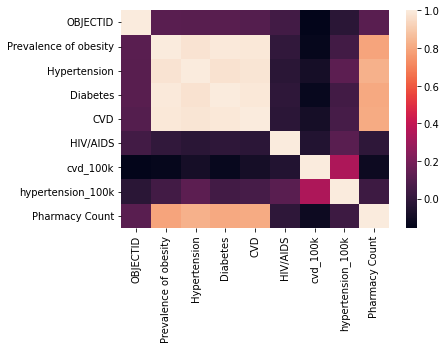

In [72]:
# Plotting the heat map
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(df_diseases.corr())

plt.savefig("Graphs/HeatMap.jpg")

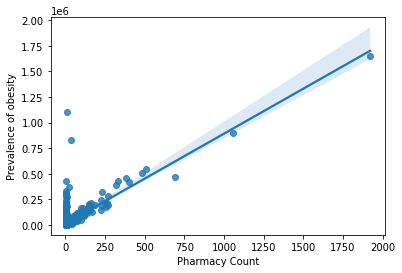

In [73]:
# Plotting scatterplot for obesity vs pharmacy count
sns.regplot(x=df_diseases["Pharmacy Count"], y=df_diseases["Prevalence of obesity"])
plt.savefig("Graphs/Scatterplot_Obesity.jpg")

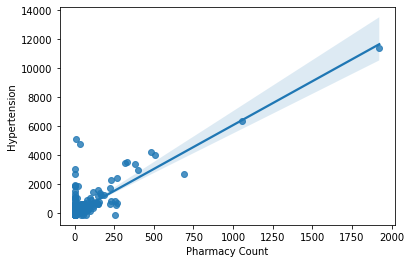

In [74]:
# Plotting scatterplot for hypertension vs pharmacy count
sns.regplot(x=df_diseases["Pharmacy Count"], y=df_diseases["Hypertension"])
plt.savefig("Graphs/Scatterplot_Hypertension.jpg")

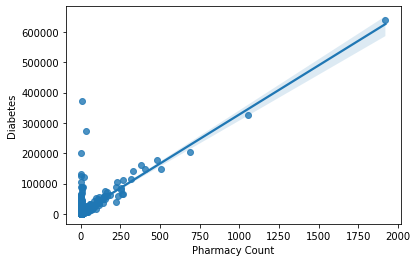

In [75]:
# Plotting scatterplot for diabetes vs pharmacy count
sns.regplot(x=df_diseases["Pharmacy Count"], y=df_diseases["Diabetes"])
plt.savefig("Graphs/Scatterplot_Diabetes.jpg")

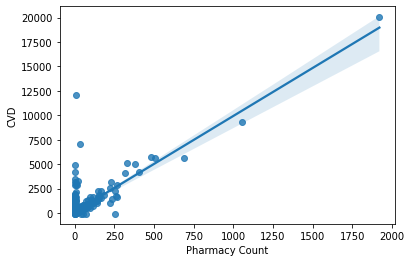

In [76]:
# Plotting scatterplot for CVD vs pharmacy count
sns.regplot(x=df_diseases["Pharmacy Count"], y=df_diseases["CVD"])
plt.savefig("Graphs/Scatterplot_CVD.jpg")

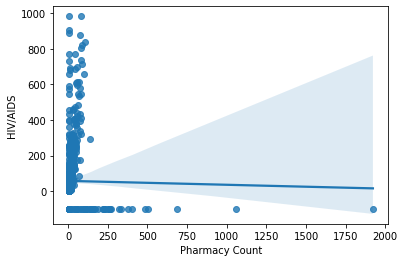

In [77]:
# Plotting scatterplot for HIV/AIDS vs pharmacy count
sns.regplot(x=df_diseases["Pharmacy Count"], y=df_diseases["HIV/AIDS"])
plt.savefig("Graphs/Scatterplot_HIV.jpg")

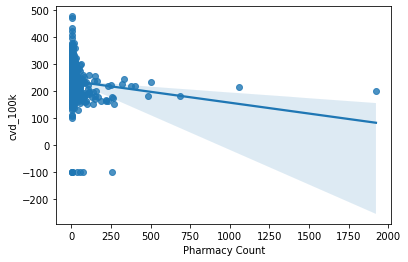

In [78]:
# Plotting scatterplot for CVD(per 100K) vs pharmacy count
sns.regplot(x=df_diseases["Pharmacy Count"], y=df_diseases["cvd_100k"])
plt.savefig("Graphs/Scatterplot_cvd_100k.jpg")

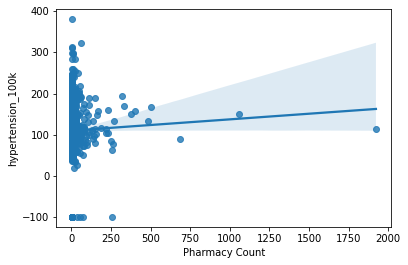

In [79]:
# Plotting scatterplot for hypertension (per 100K) vs pharmacy count
sns.regplot(x=df_diseases["Pharmacy Count"], y=df_diseases["hypertension_100k"])
plt.savefig("Graphs/Scatterplot_hypertension_100k.jpg")